In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import pickle # to load information from trained models

models_file = open('models', 'rb')

models = pickle.load(models_file)

models_file.close()

In [2]:
models

[{0: {'features': 'all features',
   'layers': (112, 56, 30, 10),
   'test size': 0.4,
   'alpha': 1.0,
   'lambda': 1000,
   'train accuracy': 0.30787037037037035,
   'test accuracy': 0.3151041666666667},
  1: {'features': 'all features',
   'layers': (112, 56, 30, 10),
   'test size': 0.4,
   'alpha': 1.0,
   'lambda': 100,
   'train accuracy': 0.34664351851851855,
   'test accuracy': 0.3133680555555556},
  2: {'features': 'all features',
   'layers': (112, 56, 30, 10),
   'test size': 0.4,
   'alpha': 1.0,
   'lambda': 1.0,
   'train accuracy': 0.33622685185185186,
   'test accuracy': 0.3289930555555556},
  3: {'features': 'all features',
   'layers': (112, 56, 30, 10),
   'test size': 0.4,
   'alpha': 1.0,
   'lambda': 0.1,
   'train accuracy': 0.3402777777777778,
   'test accuracy': 0.3229166666666667},
  4: {'features': 'all features',
   'layers': (112, 56, 30, 10),
   'test size': 0.4,
   'alpha': 1.0,
   'lambda': 0.01,
   'train accuracy': 0.33738425925925924,
   'test accura

In [17]:
def write_table(file, dic, features, test_size):
    lams = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 100., 1000.]
    alphas = [0.001, 0.01, 0.1, 1.]
    
    file.write("Lambda \\ best model info,data,0.00001,0.0001,0.001,0.01,0.1,1,100,1000\n")
    lst = []
    for d in dic.values():
        # add alpha, num_layers, lam, train, test to list
        if d['features'] == features and d['test size'] == test_size:
#         if d['name'] == features and d['test size'] == test_size:
#             d_info = (d['alpha'], len(d['layers']), d['lambda'], d['train accuracy'], d['test accuracy'])
            layer_len = 0
            if type(d['layers']) == int:
                layer_len = 1
            else:
                layer_len = len(d['layers'])
            d_info = (d['alpha'], layer_len, d['lambda'], d['train accuracy'], d['test accuracy'])
#             d_info = (d['alpha'], layer_len, d['lambda']) # for testing on old data
            lst.append(d_info)
        
    lst.sort()
    # next: actually write to file
    
    for i in range(len(lst)//len(lams)):
        j = i * len(lams)
        # TODO switch out 2s with train and test accuracies (3 and 4)
        data = f'a={lst[j][0]},train ({lst[j][1]}){"*"*lst[j][1]},{lst[j][3]},{lst[j+1][3]},{lst[j+2][3]},{lst[j+3][3]},{lst[j+4][3]},{lst[j+5][3]},{lst[j+6][3]},{lst[j+7][3]}\n' + \
                f'a={lst[j][0]},test ({lst[j][1]}){"*"*lst[j][1]},{lst[j][4]},{lst[j+1][4]},{lst[j+2][4]},{lst[j+3][4]},{lst[j+4][4]},{lst[j+5][4]},{lst[j+6][4]},{lst[j+7][4]}\n'
        file.write(data)


In [18]:
with open('test.csv', 'w') as file:
    z = write_table(file, models[0], 'all features', 0.4)
    print(z)

None


1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000
1e-05,0.0001,0.001,0.01,0.1,1.0,100,1000

`models` has the following structure:
```python
models = [
    model_info_a_log,  # models[0]
    model_info_b_log,  # models[1]
    model_info_c_log,  # models[2]
    model_info_d_log,  # models[3]
    
    model_info_a_tanh, # models[4]
    model_info_b_tanh, # models[5]
    model_info_c_tanh, # models[6]
    model_info_d_tanh  # models[7]
]
```

where each `model` index holds a nested dictionary of model information, keyed using the training and test accuracies:

```python
# structure of models[i]
models[i] = {
    # each key is a tuple of the training and testing accuracies
    (training_accuracy, testing_accuracy) : {
            # value keys are for name, layers, test size, alpha value, and lambda value
            'name' : name,
            'layers' : layers,
            'test size' : test_size,
            'alpha' : alpha,
            'lambda' : lam
        }
}
```

In [19]:
i = 0
for act in ['log', 'tanh']:
    for user in ['a', 'b', 'c', 'd']:
        for feature in ['all', 'std', 'mean']: # need to add ' features' when putting in function
            for split in [0.4, 0.3]: # need to *10 and str in file name
                filename = f'./nn_data/user_{user}/{act}/{feature}_{int((1-split)*10)}0_train.csv'
                with open(filename, 'w') as file:
                    write_table(file, models[i], f'{feature} features', split)
        i += 1

In [79]:
import matplotlib.pyplot as plt

def plot_lam_info(dic, fname, features, test_size):
    lams = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 100., 1000.]
    alphas = [0.001, 0.01, 0.1, 1.]
    lst = []
    for layer in [1,3,4]:
        # for each layer structure, gather alphas and lambdas
        for a in alphas:
            # for each alpha, plot the accuracy for different lambdas
            # TODO for each lambda, plot accuracy for different alphas
            ls = []
            accs = []
            for l in lams:
                for d in dic.values():
                # add alpha, num_layers, lam, train, test to list
                    if d['features'] == features and d['test size'] == test_size and d['alpha'] == a and d['lambda'] == l:
                        layer_len = 0
                        if type(d['layers']) == int:
                            layer_len = 1
                        else:
                            layer_len = len(d['layers'])
                        if layer_len == layer:
                            ls += [l]
                            accs += [d['test accuracy']]
            plt.title(f'{features}, alpha={a}, layers={layer}')
            plt.xlabel("lambda values")
            plt.ylabel("test accuracy")
            plt.xscale('log')
            plt.plot(ls, accs)
            print(f'{fname}_a={str(a).replace(".","_")}_layers={layer}')
            plt.savefig(f'./nn_data/plots/{fname}_a_{str(a).replace(".","_")}_{layer}_layers')
            #plt.show()
            plt.clf()


In [80]:
import matplotlib.pyplot as plt
# plot lambda vs accuracy for best value of alpha, for each network structure

def plot_alpha_info(dic, fname, features, test_size):
    lams = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 100., 1000.]
    alphas = [0.001, 0.01, 0.1, 1.]
    lst = []
    for layer in [1,3,4]:
        # for each layer structure, gather alphas and lambdas
        for l in lams:
            # for each lambda, plot accuracy for different alphas
            als = []
            accs = []
            for a in alphas:
                for d in dic.values():
                # add alpha, num_layers, lam, train, test to list
                    if d['features'] == features and d['test size'] == test_size and d['alpha'] == a and d['lambda'] == l:
                        layer_len = 0
                        if type(d['layers']) == int:
                            layer_len = 1
                        else:
                            layer_len = len(d['layers'])
                        if layer_len == layer:
                            als += [a]
                            accs += [d['test accuracy']]
            plt.title(f'{features}, lambda={l}, layers={layer}')
            plt.xlabel("alpha values")
            plt.ylabel("test accuracy")
            plt.xscale('log')
            plt.plot(als, accs)
            print(f'{fname}_l={str(l).replace(".","_")}_layers={layer}')
            plt.savefig(f'./nn_data/plots/{fname}_a_{str(a).replace(".","_")}_{layer}_layers')
            #plt.show()
            plt.clf()


In [76]:
# testing
#plot_lam_info(models[0], 'user_a_log', 'all features', 0.4)

In [81]:
i = 0
for act in ['log', 'tanh']:
    for user in ['a', 'b', 'c', 'd']:
        for feature in ['all', 'std', 'mean']: # need to add ' features' when putting in function
            for split in [0.4, 0.3]:
                plot_lam_info(models[i], f'user_{user}_{act}_{int((1-split)*100)}', f'{feature} features', split)
                plot_alpha_info(models[i], f'user_{user}_{act}_{int((1-split)*100)}', f'{feature} features', split)
        i += 1

user_a_log_60_a=0_001_layers=1
user_a_log_60_a=0_01_layers=1
user_a_log_60_a=0_1_layers=1
user_a_log_60_a=1_0_layers=1
user_a_log_60_a=0_001_layers=3
user_a_log_60_a=0_01_layers=3
user_a_log_60_a=0_1_layers=3
user_a_log_60_a=1_0_layers=3
user_a_log_60_a=0_001_layers=4
user_a_log_60_a=0_01_layers=4
user_a_log_60_a=0_1_layers=4
user_a_log_60_a=1_0_layers=4
user_a_log_60_l=1e-05_layers=1
user_a_log_60_l=0_0001_layers=1
user_a_log_60_l=0_001_layers=1
user_a_log_60_l=0_01_layers=1
user_a_log_60_l=0_1_layers=1
user_a_log_60_l=1_0_layers=1
user_a_log_60_l=100_0_layers=1
user_a_log_60_l=1000_0_layers=1
user_a_log_60_l=1e-05_layers=3
user_a_log_60_l=0_0001_layers=3
user_a_log_60_l=0_001_layers=3
user_a_log_60_l=0_01_layers=3
user_a_log_60_l=0_1_layers=3
user_a_log_60_l=1_0_layers=3
user_a_log_60_l=100_0_layers=3
user_a_log_60_l=1000_0_layers=3
user_a_log_60_l=1e-05_layers=4
user_a_log_60_l=0_0001_layers=4
user_a_log_60_l=0_001_layers=4
user_a_log_60_l=0_01_layers=4
user_a_log_60_l=0_1_layers=4


user_b_log_70_l=1000_0_layers=1
user_b_log_70_l=1e-05_layers=3
user_b_log_70_l=0_0001_layers=3
user_b_log_70_l=0_001_layers=3
user_b_log_70_l=0_01_layers=3
user_b_log_70_l=0_1_layers=3
user_b_log_70_l=1_0_layers=3
user_b_log_70_l=100_0_layers=3
user_b_log_70_l=1000_0_layers=3
user_b_log_70_l=1e-05_layers=4
user_b_log_70_l=0_0001_layers=4
user_b_log_70_l=0_001_layers=4
user_b_log_70_l=0_01_layers=4
user_b_log_70_l=0_1_layers=4
user_b_log_70_l=1_0_layers=4
user_b_log_70_l=100_0_layers=4
user_b_log_70_l=1000_0_layers=4
user_b_log_60_a=0_001_layers=1
user_b_log_60_a=0_01_layers=1
user_b_log_60_a=0_1_layers=1
user_b_log_60_a=1_0_layers=1
user_b_log_60_a=0_001_layers=3
user_b_log_60_a=0_01_layers=3
user_b_log_60_a=0_1_layers=3
user_b_log_60_a=1_0_layers=3
user_b_log_60_a=0_001_layers=4
user_b_log_60_a=0_01_layers=4
user_b_log_60_a=0_1_layers=4
user_b_log_60_a=1_0_layers=4
user_b_log_60_l=1e-05_layers=1
user_b_log_60_l=0_0001_layers=1
user_b_log_60_l=0_001_layers=1
user_b_log_60_l=0_01_layers

user_c_log_70_a=0_01_layers=1
user_c_log_70_a=0_1_layers=1
user_c_log_70_a=1_0_layers=1
user_c_log_70_a=0_001_layers=3
user_c_log_70_a=0_01_layers=3
user_c_log_70_a=0_1_layers=3
user_c_log_70_a=1_0_layers=3
user_c_log_70_a=0_001_layers=4
user_c_log_70_a=0_01_layers=4
user_c_log_70_a=0_1_layers=4
user_c_log_70_a=1_0_layers=4
user_c_log_70_l=1e-05_layers=1
user_c_log_70_l=0_0001_layers=1
user_c_log_70_l=0_001_layers=1
user_c_log_70_l=0_01_layers=1
user_c_log_70_l=0_1_layers=1
user_c_log_70_l=1_0_layers=1
user_c_log_70_l=100_0_layers=1
user_c_log_70_l=1000_0_layers=1
user_c_log_70_l=1e-05_layers=3
user_c_log_70_l=0_0001_layers=3
user_c_log_70_l=0_001_layers=3
user_c_log_70_l=0_01_layers=3
user_c_log_70_l=0_1_layers=3
user_c_log_70_l=1_0_layers=3
user_c_log_70_l=100_0_layers=3
user_c_log_70_l=1000_0_layers=3
user_c_log_70_l=1e-05_layers=4
user_c_log_70_l=0_0001_layers=4
user_c_log_70_l=0_001_layers=4
user_c_log_70_l=0_01_layers=4
user_c_log_70_l=0_1_layers=4
user_c_log_70_l=1_0_layers=4
us

user_d_log_60_l=1e-05_layers=3
user_d_log_60_l=0_0001_layers=3
user_d_log_60_l=0_001_layers=3
user_d_log_60_l=0_01_layers=3
user_d_log_60_l=0_1_layers=3
user_d_log_60_l=1_0_layers=3
user_d_log_60_l=100_0_layers=3
user_d_log_60_l=1000_0_layers=3
user_d_log_60_l=1e-05_layers=4
user_d_log_60_l=0_0001_layers=4
user_d_log_60_l=0_001_layers=4
user_d_log_60_l=0_01_layers=4
user_d_log_60_l=0_1_layers=4
user_d_log_60_l=1_0_layers=4
user_d_log_60_l=100_0_layers=4
user_d_log_60_l=1000_0_layers=4
user_d_log_70_a=0_001_layers=1
user_d_log_70_a=0_01_layers=1
user_d_log_70_a=0_1_layers=1
user_d_log_70_a=1_0_layers=1
user_d_log_70_a=0_001_layers=3
user_d_log_70_a=0_01_layers=3
user_d_log_70_a=0_1_layers=3
user_d_log_70_a=1_0_layers=3
user_d_log_70_a=0_001_layers=4
user_d_log_70_a=0_01_layers=4
user_d_log_70_a=0_1_layers=4
user_d_log_70_a=1_0_layers=4
user_d_log_70_l=1e-05_layers=1
user_d_log_70_l=0_0001_layers=1
user_d_log_70_l=0_001_layers=1
user_d_log_70_l=0_01_layers=1
user_d_log_70_l=0_1_layers=1


user_a_tanh_70_l=0_01_layers=4
user_a_tanh_70_l=0_1_layers=4
user_a_tanh_70_l=1_0_layers=4
user_a_tanh_70_l=100_0_layers=4
user_a_tanh_70_l=1000_0_layers=4
user_b_tanh_60_a=0_001_layers=1
user_b_tanh_60_a=0_01_layers=1
user_b_tanh_60_a=0_1_layers=1
user_b_tanh_60_a=1_0_layers=1
user_b_tanh_60_a=0_001_layers=3
user_b_tanh_60_a=0_01_layers=3
user_b_tanh_60_a=0_1_layers=3
user_b_tanh_60_a=1_0_layers=3
user_b_tanh_60_a=0_001_layers=4
user_b_tanh_60_a=0_01_layers=4
user_b_tanh_60_a=0_1_layers=4
user_b_tanh_60_a=1_0_layers=4
user_b_tanh_60_l=1e-05_layers=1
user_b_tanh_60_l=0_0001_layers=1
user_b_tanh_60_l=0_001_layers=1
user_b_tanh_60_l=0_01_layers=1
user_b_tanh_60_l=0_1_layers=1
user_b_tanh_60_l=1_0_layers=1
user_b_tanh_60_l=100_0_layers=1
user_b_tanh_60_l=1000_0_layers=1
user_b_tanh_60_l=1e-05_layers=3
user_b_tanh_60_l=0_0001_layers=3
user_b_tanh_60_l=0_001_layers=3
user_b_tanh_60_l=0_01_layers=3
user_b_tanh_60_l=0_1_layers=3
user_b_tanh_60_l=1_0_layers=3
user_b_tanh_60_l=100_0_layers=3
us

user_c_tanh_70_a=0_01_layers=3
user_c_tanh_70_a=0_1_layers=3
user_c_tanh_70_a=1_0_layers=3
user_c_tanh_70_a=0_001_layers=4
user_c_tanh_70_a=0_01_layers=4
user_c_tanh_70_a=0_1_layers=4
user_c_tanh_70_a=1_0_layers=4
user_c_tanh_70_l=1e-05_layers=1
user_c_tanh_70_l=0_0001_layers=1
user_c_tanh_70_l=0_001_layers=1
user_c_tanh_70_l=0_01_layers=1
user_c_tanh_70_l=0_1_layers=1
user_c_tanh_70_l=1_0_layers=1
user_c_tanh_70_l=100_0_layers=1
user_c_tanh_70_l=1000_0_layers=1
user_c_tanh_70_l=1e-05_layers=3
user_c_tanh_70_l=0_0001_layers=3
user_c_tanh_70_l=0_001_layers=3
user_c_tanh_70_l=0_01_layers=3
user_c_tanh_70_l=0_1_layers=3
user_c_tanh_70_l=1_0_layers=3
user_c_tanh_70_l=100_0_layers=3
user_c_tanh_70_l=1000_0_layers=3
user_c_tanh_70_l=1e-05_layers=4
user_c_tanh_70_l=0_0001_layers=4
user_c_tanh_70_l=0_001_layers=4
user_c_tanh_70_l=0_01_layers=4
user_c_tanh_70_l=0_1_layers=4
user_c_tanh_70_l=1_0_layers=4
user_c_tanh_70_l=100_0_layers=4
user_c_tanh_70_l=1000_0_layers=4
user_c_tanh_60_a=0_001_laye

user_d_tanh_60_l=0_01_layers=1
user_d_tanh_60_l=0_1_layers=1
user_d_tanh_60_l=1_0_layers=1
user_d_tanh_60_l=100_0_layers=1
user_d_tanh_60_l=1000_0_layers=1
user_d_tanh_60_l=1e-05_layers=3
user_d_tanh_60_l=0_0001_layers=3
user_d_tanh_60_l=0_001_layers=3
user_d_tanh_60_l=0_01_layers=3
user_d_tanh_60_l=0_1_layers=3
user_d_tanh_60_l=1_0_layers=3
user_d_tanh_60_l=100_0_layers=3
user_d_tanh_60_l=1000_0_layers=3
user_d_tanh_60_l=1e-05_layers=4
user_d_tanh_60_l=0_0001_layers=4
user_d_tanh_60_l=0_001_layers=4
user_d_tanh_60_l=0_01_layers=4
user_d_tanh_60_l=0_1_layers=4
user_d_tanh_60_l=1_0_layers=4
user_d_tanh_60_l=100_0_layers=4
user_d_tanh_60_l=1000_0_layers=4
user_d_tanh_70_a=0_001_layers=1
user_d_tanh_70_a=0_01_layers=1
user_d_tanh_70_a=0_1_layers=1
user_d_tanh_70_a=1_0_layers=1
user_d_tanh_70_a=0_001_layers=3
user_d_tanh_70_a=0_01_layers=3
user_d_tanh_70_a=0_1_layers=3
user_d_tanh_70_a=1_0_layers=3
user_d_tanh_70_a=0_001_layers=4
user_d_tanh_70_a=0_01_layers=4
user_d_tanh_70_a=0_1_layers=4

<Figure size 640x480 with 0 Axes>

user_a_log_l=1e-05_layers=1


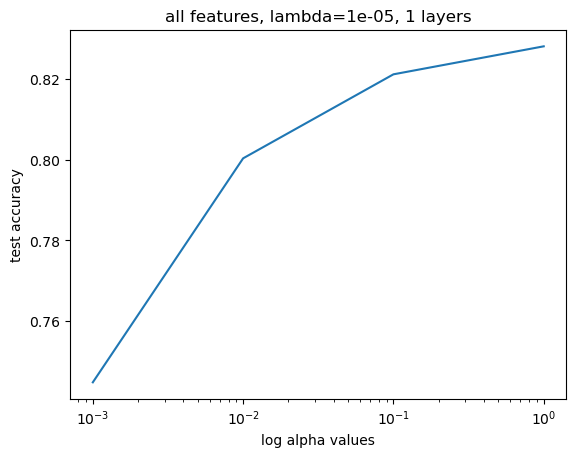

user_a_log_l=0_0001_layers=1


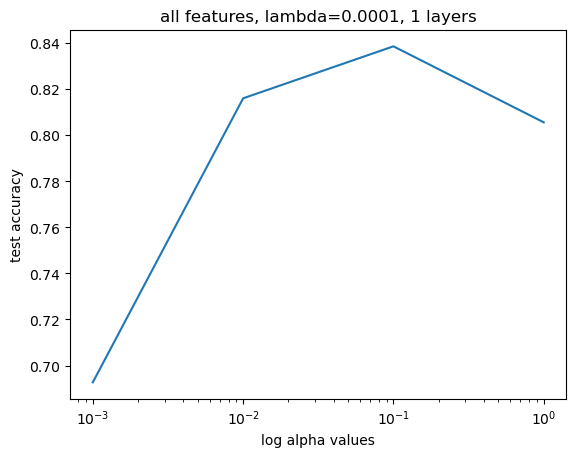

user_a_log_l=0_001_layers=1


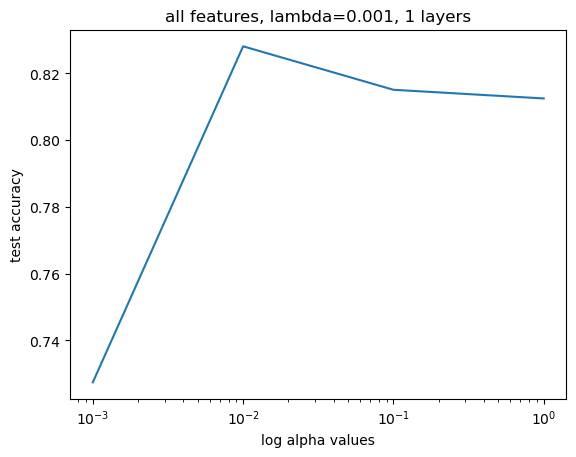

user_a_log_l=0_01_layers=1


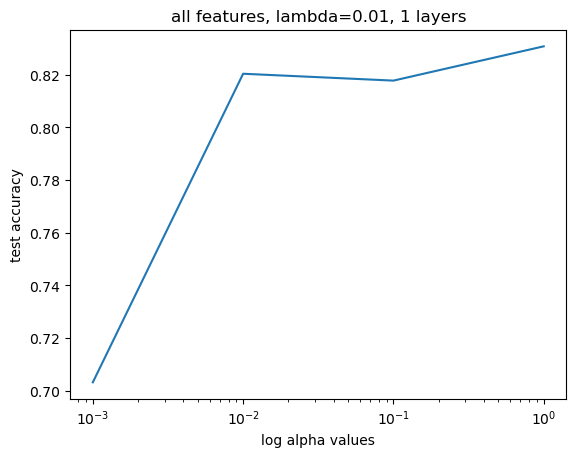

user_a_log_l=0_1_layers=1


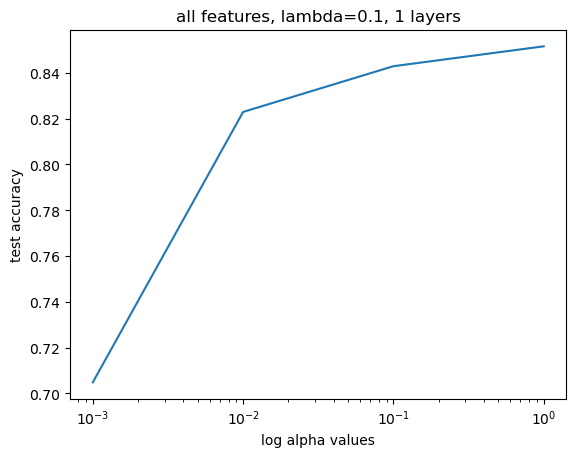

user_a_log_l=1_0_layers=1


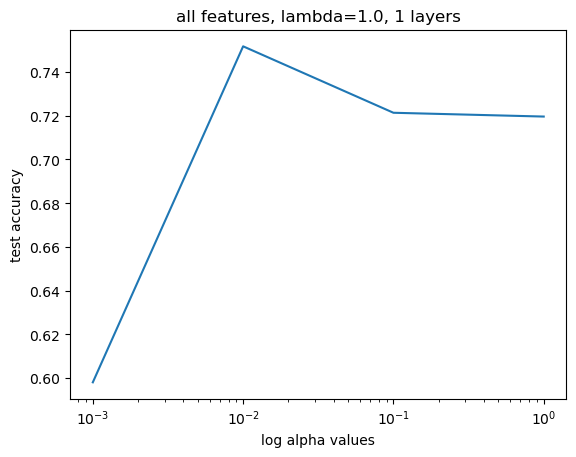

user_a_log_l=100_0_layers=1


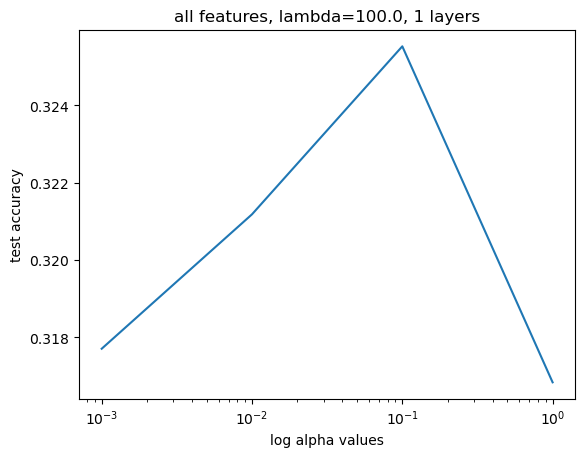

user_a_log_l=1000_0_layers=1


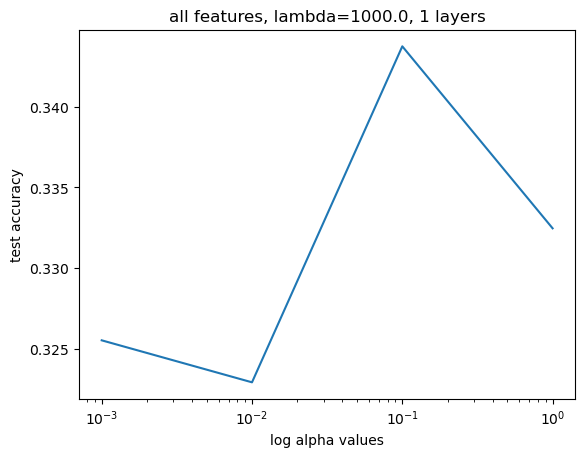

user_a_log_l=1e-05_layers=3


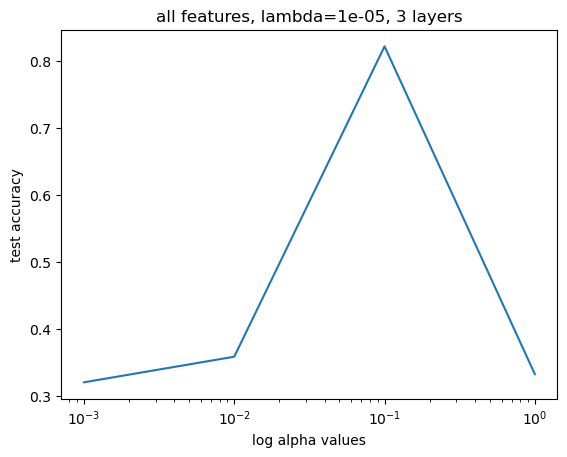

user_a_log_l=0_0001_layers=3


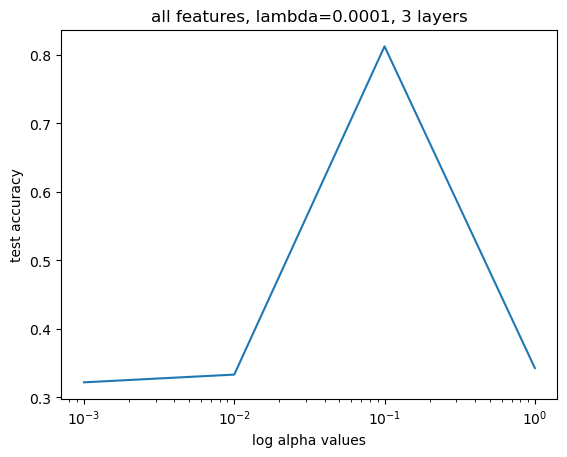

user_a_log_l=0_001_layers=3


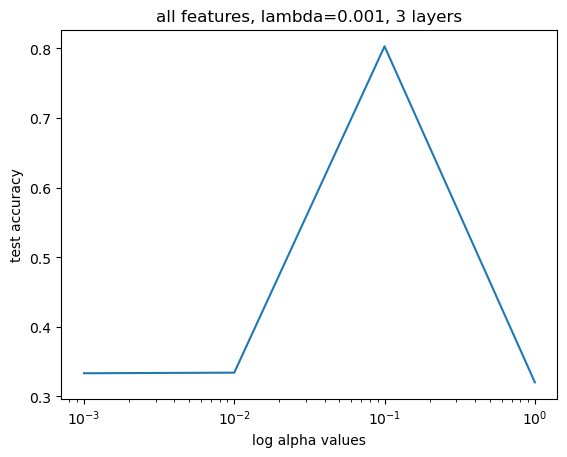

user_a_log_l=0_01_layers=3


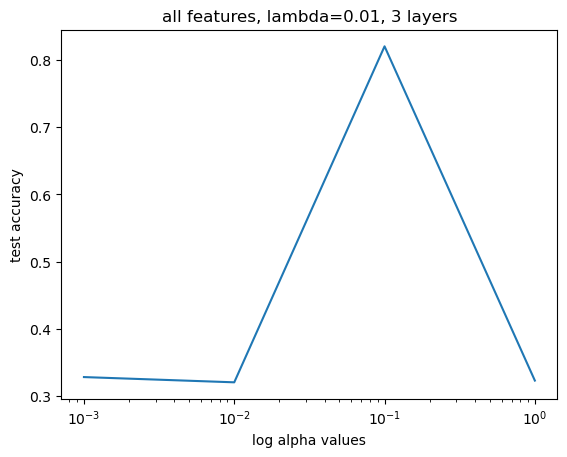

user_a_log_l=0_1_layers=3


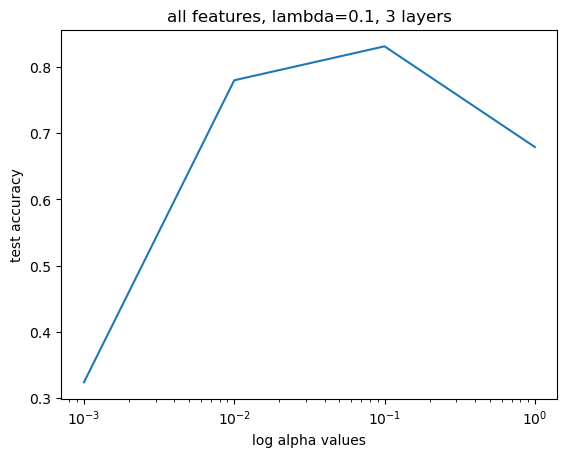

user_a_log_l=1_0_layers=3


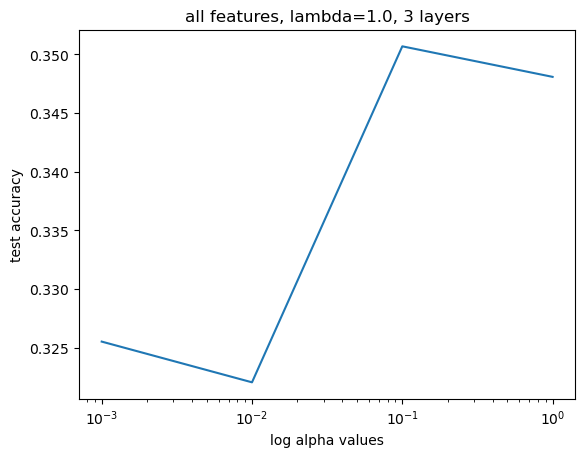

user_a_log_l=100_0_layers=3


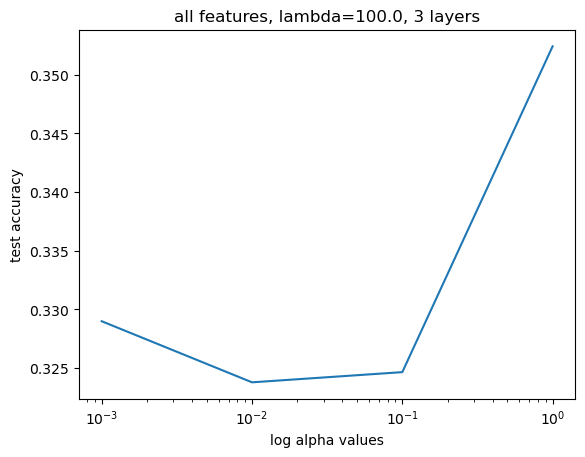

user_a_log_l=1000_0_layers=3


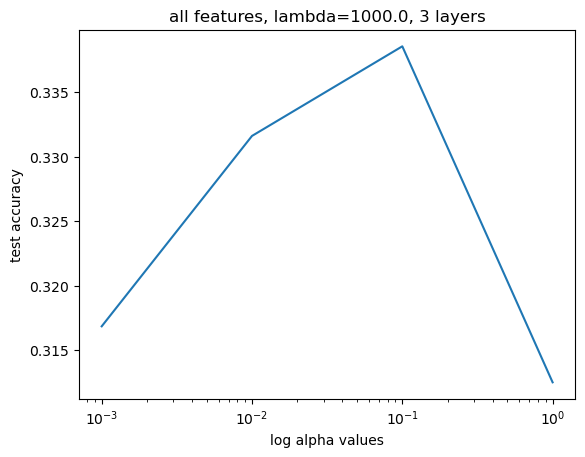

user_a_log_l=1e-05_layers=4


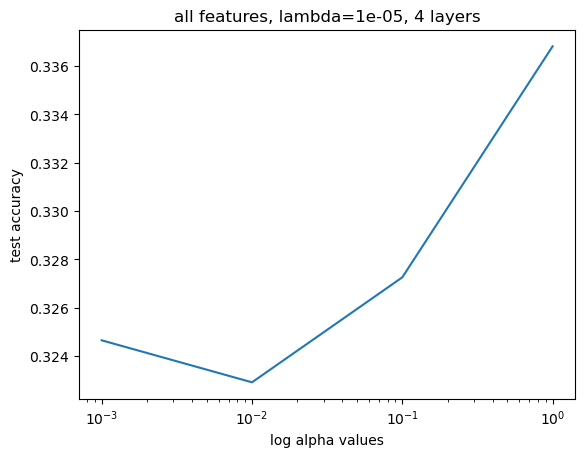

user_a_log_l=0_0001_layers=4


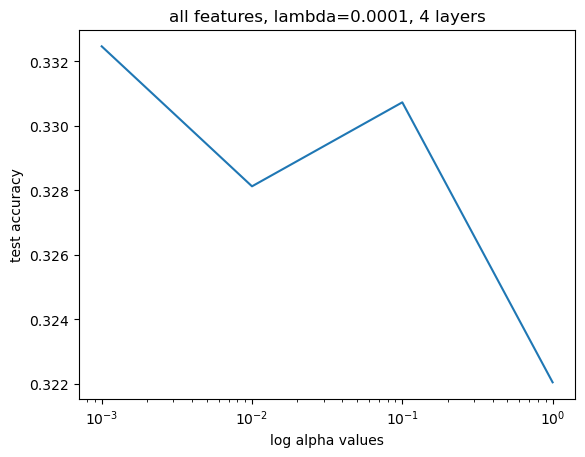

user_a_log_l=0_001_layers=4


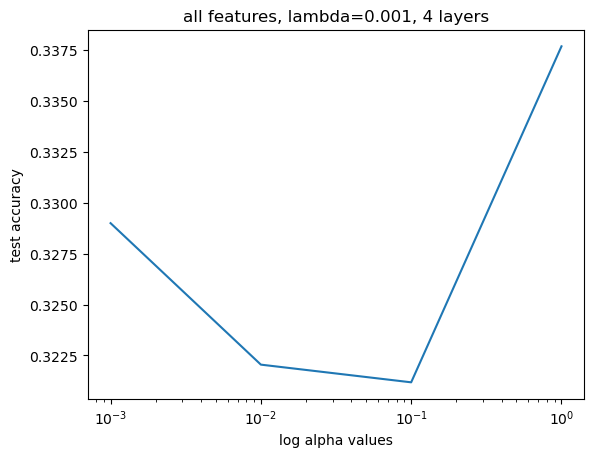

user_a_log_l=0_01_layers=4


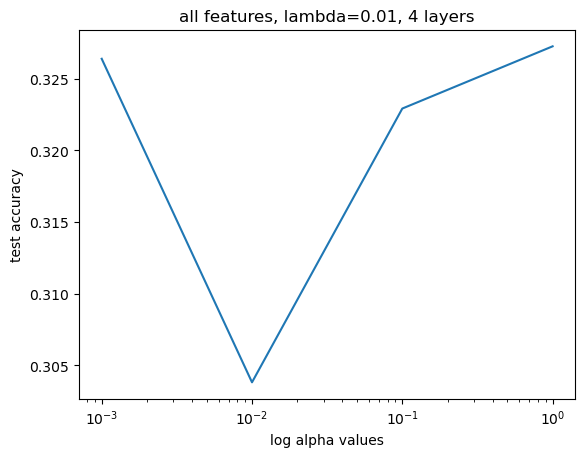

user_a_log_l=0_1_layers=4


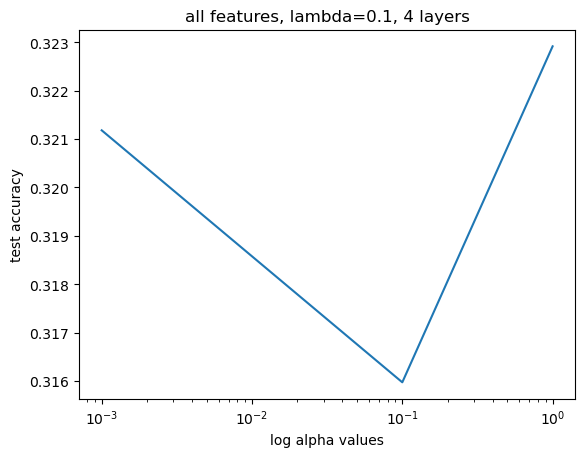

user_a_log_l=1_0_layers=4


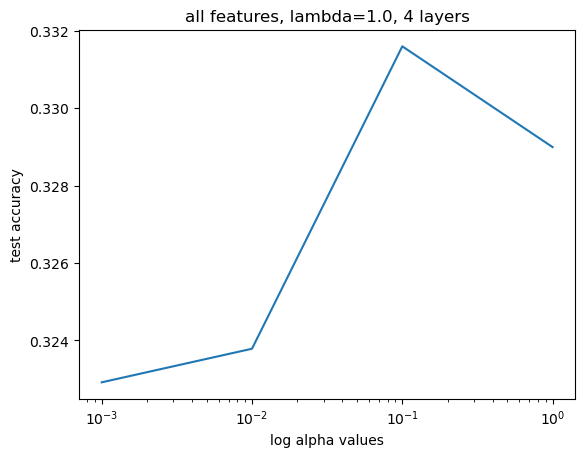

user_a_log_l=100_0_layers=4


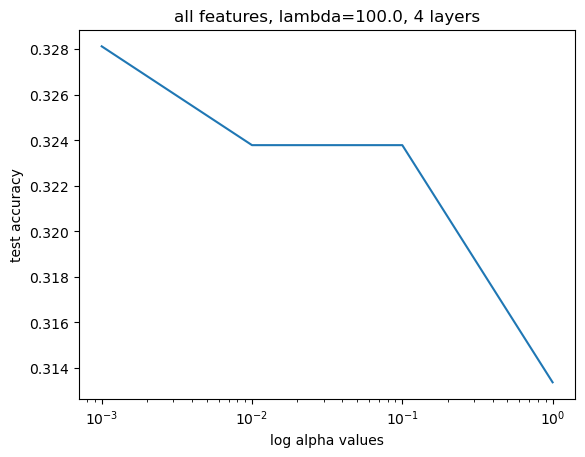

user_a_log_l=1000_0_layers=4


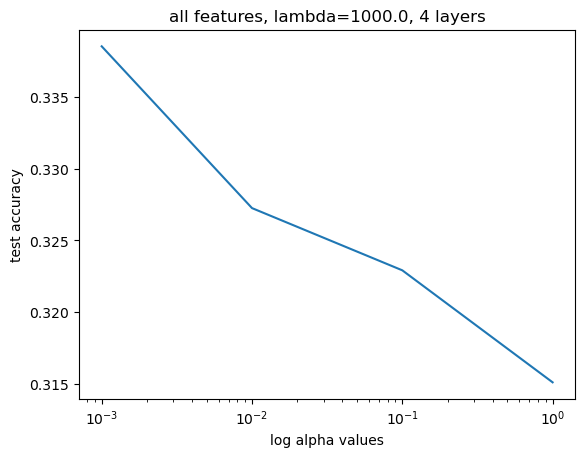

In [71]:
plot_alpha_info(models[0], 'user_a_log', 'all features', 0.4)

In [ ]:
# getting rid of a lot of data, I hope
for group in models:
    for _, info in group.items():
        del info['classifier']